# IMPORT

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import numpy as np
import matplotlib.patches as mpatches
from IPython.display import display
from IPython.display import HTML
# Load the multi-stream data
path_multistream = "/home/dani/trail22KD/testdir/multistream/inference_results.csv"
df_multistream = pd.read_csv(path_multistream)

# Load the data
path = "/home/dani/trail22KD/testdir/WALT-journal/inference_results.csv"
df = pd.read_csv(path)
# Convert source_domain and source_period into a tuple for easy comparison
df['source_combo'] = list(zip(df['source_domain'], df['source_period']))

# Filter for rows where the strategy is in STRATEGIES_TO_EXCLUDE and source domain is equal to target domain
MODELS = ['yolov8n', 'yolov8s', 'yolov8m', 'yolov8l', 'yolov8x6']
models_df = df[df['strategy'].isin(MODELS)]

# Exclude models from strategies
df_without_coco = df[~df['strategy'].isin(MODELS)]

# Filter for rows where source domain is equal to target domain
same_domain_df = df_without_coco[df_without_coco['source_domain'] == df_without_coco['target_domain']].copy()# Added .copy() to prevent SettingWithCopyWarning


<h1> <font color="blue"> 1. SCALABILITY - VALIDATION OF STRATEGIES UP TO 9 cameras </font><h1>
 

In [5]:
def generate_plot(dataframe, strategies, samples, eligible_domains_periods, df, MODELS_TO_PLOT):
    # Filter for a specific sample, strategy and the domain-period combinations
    filtered_df = dataframe[(dataframe['strategy'].isin(strategies)) & 
                            (dataframe['samples'].isin(samples)) & 
                            (dataframe['source_combo'].isin(eligible_domains_periods))]

    # Group by strategy and sample and calculate average 'mAP50-95'
    grouped_df = filtered_df.groupby(['strategy', 'samples']).mean(numeric_only=True)['mAP50-95'].reset_index()

    # Pivot to wide format for plotting
    pivot_df = grouped_df.pivot(index='samples', columns='strategy', values='mAP50-95')
    # Plot
    plt.figure(figsize=(10, 8))
    ax = plt.gca()  # get the current axes, creating them if necessary
    for column in pivot_df.columns:
        plt.plot(pivot_df.index, pivot_df[column], marker='', linewidth=2, label=column)

    # Filter for rows for strategies to be plot
   
    models_to_plot_df = df[df['strategy'].isin(MODELS_TO_PLOT)]

    # Calculate average 'mAP50-95' for each strategy
    models_df_avg = models_to_plot_df.groupby('strategy').mean(numeric_only=True)['mAP50-95']
    display(models_df_avg)
    
    # For each model, add a horizontal line across the entire x-axis range
    for strategy, avg_mAP in models_df_avg.items():
        ax.hlines(avg_mAP, xmin=pivot_df.index.min(), xmax=pivot_df.index.max(), colors='black', linestyles='dotted', alpha=1, linewidth=2)  # adjust linewidth here
        # annotate the lines
        plt.text(pivot_df.index.max(), avg_mAP, f"{strategy}: {avg_mAP:.2f}", color='red', va='center', ha='left')


    # Set labels, legend, and title
    ax.legend()
    ax.set_title('Average mAP50-95 values per sample for different strategies')
    ax.set_xlabel('Samples')
    ax.set_ylabel('Average mAP50-95')
    ax.grid(True)

    plt.show()
    return filtered_df



 <h2> <font color="blue"> 1.1. ALL ELIGIBLE CAMERAS - WEEKS - SAMPLES </font><h2>

strategy
yolov8m     0.556000
yolov8n     0.483778
yolov8x6    0.560222
Name: mAP50-95, dtype: float64

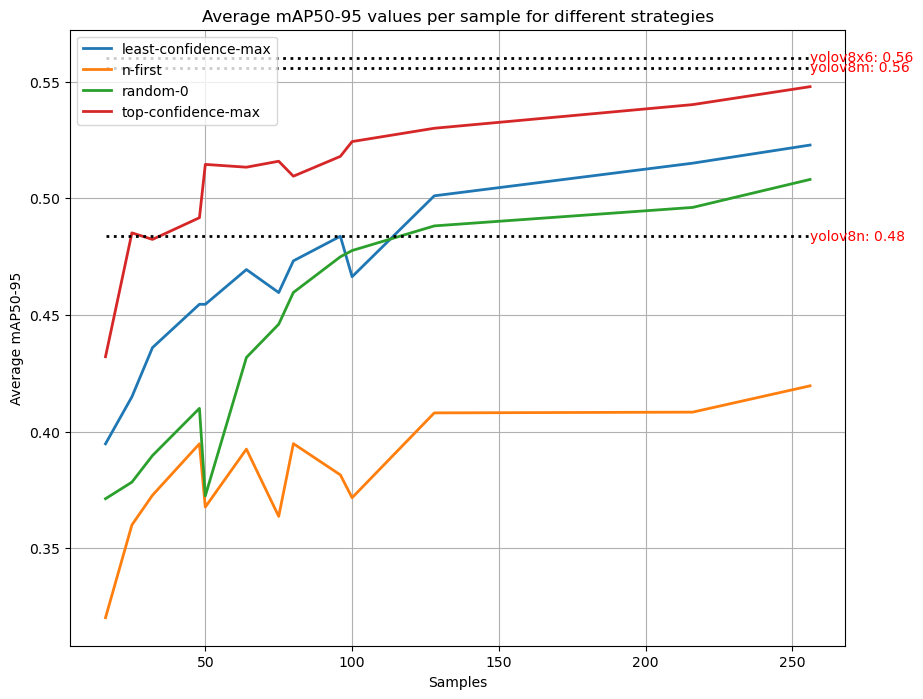

In [6]:
# Create a list of domains and periods for which we want to filter
eligible_scalability_domains_periods = [('cam1', 'week1'), ('cam1', 'week2'), ('cam1', 'week3'), ('cam1', 'week4'),
                                        ('cam2', 'week1'), ('cam2', 'week2'), ('cam2', 'week3'), ('cam2', 'week4'),
                                        ('cam3', 'week5'), 
                                        ('cam4', 'week2'), ('cam4', 'week3'), 
                                        ('cam5', 'week3'), 
                                        ('cam6', 'week1'),('cam6', 'week3'),('cam6', 'week4'), 
                                        ('cam7', 'week4'), 
                                        ('cam8', 'week3'), 
                                        ('cam9', 'week1')]

all_strategies = ['n-first','random-0','top-confidence-max','least-confidence-max']
all_sample_size = [16,25,32,48,50,64,75,80,96,100,128,216,256]
MODELS_TO_PLOT = ['yolov8n', 'yolov8m', 'yolov8x6']

scalable_all_samples_all_strategies_df = generate_plot(same_domain_df, all_strategies, all_sample_size, eligible_scalability_domains_periods, df, MODELS_TO_PLOT)


 <h2> <font color="blue"> 1.2. ALL ELIGIBLE CAMERAS - WEEKS - BUT SAMPLES are multiple of 16 </font><h2>

strategy
yolov8m     0.556000
yolov8n     0.483778
yolov8x6    0.560222
Name: mAP50-95, dtype: float64

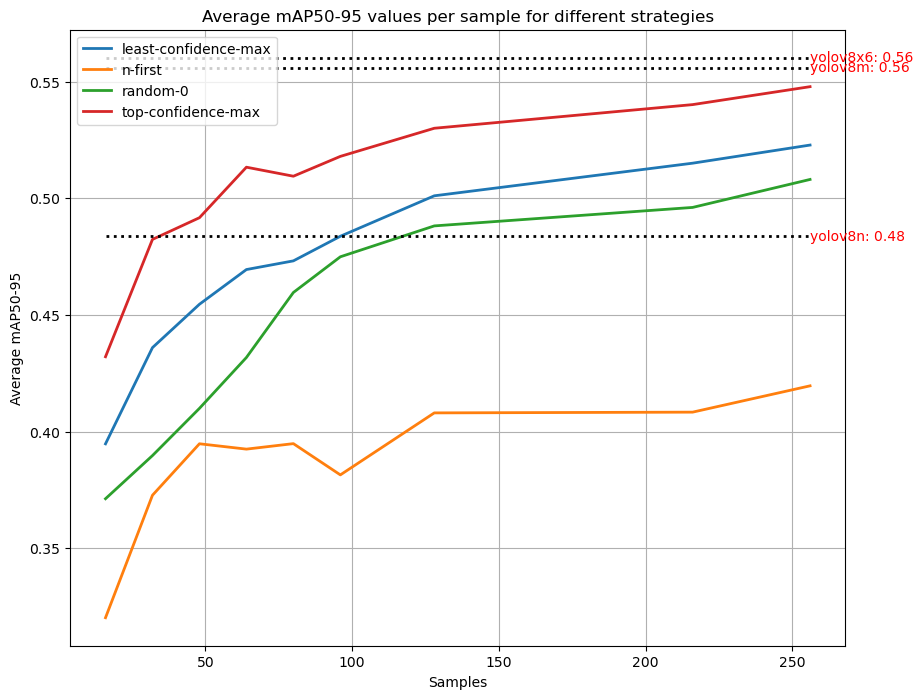

In [7]:
sixteen_multiple_sample_size = [16,32,48,64,80,96,128,216,256]


scalable_all_strategies_sixteen_multiple_samples_df=generate_plot(same_domain_df, all_strategies, sixteen_multiple_sample_size, eligible_scalability_domains_periods, df, MODELS_TO_PLOT)


<h1> <font color="blue"> 2. CLUSTERING </font><h1>


<h2> <font color="blue"> 2.1 HEATMAP </font><h2>

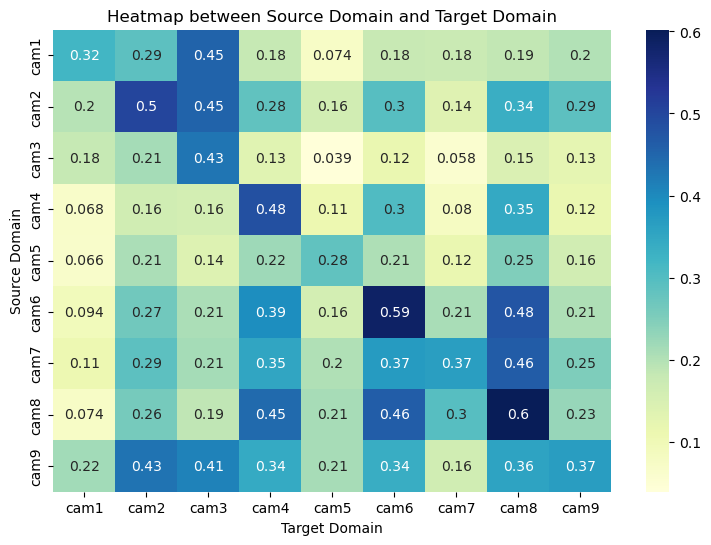

In [8]:
# First group by source_domain and target_domain and take the mean of mAP50
# Create a list of domains and periods for which we want to filter
eligible_clustering_domains_periods = [('cam1', 'week1'), ('cam1', 'week2'), ('cam1', 'week3'), ('cam1', 'week4'),
                                        ('cam2', 'week1'), ('cam2', 'week2'), ('cam2', 'week3'), ('cam2', 'week4'),
                                        ('cam3', 'week5'), 
                                        ('cam4', 'week2'), ('cam4', 'week3'), 
                                        ('cam5', 'week3'), 
                                        ('cam6', 'week1'),('cam6', 'week3'),('cam6', 'week4'), 
                                        ('cam7', 'week4'), 
                                        ('cam8', 'week3'), 
                                        ('cam9', 'week1')]


eligible_clustering_df= df_without_coco[df_without_coco['source_combo'].isin(eligible_clustering_domains_periods)]

grouped_df = eligible_clustering_df.groupby(['source_domain', 'target_domain'], as_index=False)['mAP50-95'].mean()

# Now pivot the grouped DataFrame
pivot_df = grouped_df.pivot(index='source_domain', columns='target_domain', values='mAP50-95')

# Continue with the plotting as before
plt.figure(figsize=(9,6)) 
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu')

# Set labels and title
plt.title('Heatmap between Source Domain and Target Domain')
plt.xlabel('Target Domain')
plt.ylabel('Source Domain')

plt.show()

<h2> <font color="blue"> 2.2 Hiearchichal Clustering </font><h2>


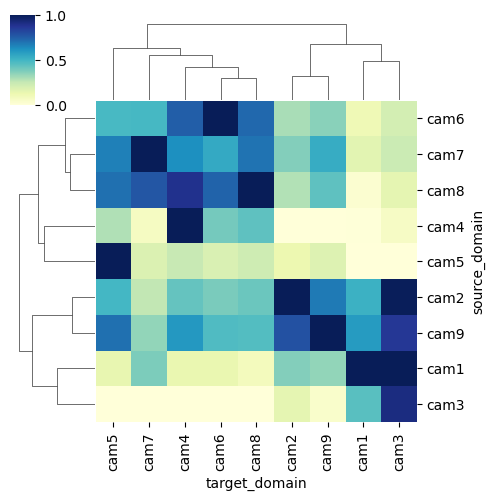

In [9]:
grid=sns.clustermap(pivot_df, cmap='YlGnBu', standard_scale=1, figsize=(5, 5))

<h2> <font color="blue"> 2.3 Definition of the clustering </font><h2>

In [10]:
from scipy.cluster.hierarchy import fcluster

# Set a distance threshold for cluster assignment
# (this should be adjusted based on the distances in your dendrogram)
threshold = 0.75

# Get the linkage matrix for the rows
row_linkage = grid.dendrogram_row.linkage

# Assign each row to a cluster
row_clusters = fcluster(row_linkage, threshold, criterion='distance')

# Get the linkage matrix for the columns
col_linkage = grid.dendrogram_col.linkage

# Assign each column to a cluster
col_clusters = fcluster(col_linkage, threshold, criterion='distance')

print(col_clusters)
# Now row_clusters and col_clusters contain the cluster assignments for the rows and columns, respectively



[5 4 5 1 3 1 2 1 4]


The application of different thresholds leads to a varying number of clusters as follows:

- **Threshold = 1.2:**   
  With this threshold, we get **2 clusters**:
    - **Cluster 1:** Contains cameras 1, 2, 3, and 9
    - **Cluster 2:** Contains cameras 4, 5, 6, 7, and 8

- **Threshold = 1.05:**  
  With this threshold, we get **3 clusters**:
    - **Cluster 1:** Contains cameras 4, 5, 6, 7, and 8
    - **Cluster 2:** Contains cameras 1 and 3
    - **Cluster 3:** Contains cameras 2 and 9

- **Threshold = 1:**   
  With this threshold, we get **4 clusters**:
    - **Cluster 1:** Contains cameras 4, 6, 7, and 8
    - **Cluster 2:** Contains cameras 1 and 3
    - **Cluster 3:** Contains cameras 2 and 9
    - **Cluster 4:** Contains camera 5

- **Threshold < 1:**  
  With a threshold less than 1, we get **5 clusters**:
    - **Cluster 1:** Contains cameras 4, 6, and 8
    - **Cluster 2:** Contains camera 7
    - **Cluster 3:** Contains cameras 2 and 9
    - **Cluster 4:** Contains camera 5
    - **Cluster 5:** Contains cameras 1 and 9

The choice of the threshold should be based on domain knowledge and the specific use case.


<h1> <font color="blue"> 3. Clustering Performance Analysis </font> </h1>

In [11]:
from scipy.stats import ttest_ind, shapiro, levene, mannwhitneyu
import pandas as pd
import numpy as np

def test_strategies(number_cluster,
                    cluster_content, selected_sample_sizes,
                    selected_strategy_single_stream,
                    selected_strategy_multi,
                    selected_source_domain_multi,
                    selected_source_period_multi,
                    restricted_eligible_clustering_df,
                    df_multistream,
                    excluded_target_domains):
    
    results = pd.DataFrame(columns=['Number Cluster', 'Cluster Content','Sample Size', 'Strategy Single Stream', 'Strategy Multi', 
                                    'Mean Single Stream', 'Mean Multi',
                                    'T-Statistic', 'P-Value', 'T-Test Result',
                                    'Shapiro-Wilk Single Stream', 'Shapiro-Wilk Multi',
                                    'Shapiro-Wilk Single Stream Result', 'Shapiro-Wilk Multi Result',
                                    'Levene', 'Levene Result', 
                                    'Mann-Whitney U', 'Mann-Whitney U Result'])
    
    for sample_size in selected_sample_sizes:
        for single_strategy, multi_strategy in zip(selected_strategy_single_stream, selected_strategy_multi):
            
            one_strategy_one_sample_df = restricted_eligible_clustering_df[
                (restricted_eligible_clustering_df['strategy'] == single_strategy) & 
                (restricted_eligible_clustering_df['samples'] == sample_size)]
            
            filtered_df_multistream = df_multistream[
                (df_multistream['strategy'] == multi_strategy) & 
                (df_multistream['samples'] == sample_size) &
                (df_multistream['source_period'] == selected_source_period_multi) &
                (df_multistream['source_domain'] == selected_source_domain_multi) &
                (~df_multistream['target_domain'].isin(excluded_target_domains))]
            
            mean_single = one_strategy_one_sample_df['mAP50-95'].mean()
            mean_multi = filtered_df_multistream['mAP50-95'].mean()

            t_statistic, p_value_t = ttest_ind(filtered_df_multistream['mAP50-95'], one_strategy_one_sample_df['mAP50-95'])
            t_test_result = 'Means are statistically different (reject H0)' if p_value_t < 0.05 else 'Means statistically undifferent'

            if len(one_strategy_one_sample_df) >= 3:
                _, p_shapiro_single = shapiro(one_strategy_one_sample_df['mAP50-95'])
                shapiro_single_result = 'Sample does not look Gaussian (reject H0)' if p_shapiro_single < 0.05 else 'Sample looks Gaussian (fail to reject H0)'
            else:
                #print(f'Warning: Sample size for one_strategy_one_sample_df is less than 3 for strategy {single_strategy} and sample size {sample_size}. Skipping Shapiro-Wilk test.')
                p_shapiro_single = None
                shapiro_single_result = 'Sample size insufficient'
            
            if len(filtered_df_multistream) >= 3:
                _, p_shapiro_multi = shapiro(filtered_df_multistream['mAP50-95'])
                shapiro_multi_result = 'Sample does not look Gaussian (reject H0)' if p_shapiro_multi < 0.05 else 'Sample looks Gaussian (fail to reject H0)'
            else:
                #print(f'Warning: Sample size for filtered_df_multistream is less than 3 for strategy {multi_strategy} and sample size {sample_size}. Skipping Shapiro-Wilk test.')
                p_shapiro_multi = None
                shapiro_multi_result = 'Sample size insufficient'
            
            _, p_levene = levene(one_strategy_one_sample_df['mAP50-95'], filtered_df_multistream['mAP50-95'])
            levene_result = 'Variances do not look equal (reject H0)' if p_levene < 0.05 else 'Variances look equal (fail to reject H0)'

            _, p_mannwhitney = mannwhitneyu(one_strategy_one_sample_df['mAP50-95'], filtered_df_multistream['mAP50-95'])
            mannwhitney_result = 'Different distribution (reject H0)' if p_mannwhitney < 0.05 else 'Same distribution (fail to reject H0)'

            new_row = pd.DataFrame([{'Number Cluster': number_cluster,
                                      'Cluster Content': cluster_content,
                                      'Sample Size': sample_size, 
                                      'Strategy Single Stream': single_strategy, 
                                      'Strategy Multi': multi_strategy, 
                                      'Mean Single Stream': mean_single,
                                      'Mean Multi': mean_multi,
                                      'T-Statistic': t_statistic, 
                                      'P-Value': p_value_t,
                                      'T-Test Result': t_test_result,
                                      'Shapiro-Wilk Single Stream': p_shapiro_single,
                                      'Shapiro-Wilk Single Stream Result': shapiro_single_result,
                                      'Shapiro-Wilk Multi': p_shapiro_multi,
                                      'Shapiro-Wilk Multi Result': shapiro_multi_result,
                                      'Levene': p_levene,
                                      'Levene Result': levene_result,
                                      'Mann-Whitney U': p_mannwhitney,
                                      'Mann-Whitney U Result': mannwhitney_result}])
            
            results = pd.concat([results, new_row], ignore_index=True)
        
    return results


def analyze_performance(number_cluster,domain_periods, sample_sizes, excluded_domains, source_domain, source_period):
    sixteen_multiple_sample_size = [16,32,48,64,80,96,128,216,256]
    restricted_eligible_clustering_df= same_domain_df[
        (same_domain_df['samples'].isin(sixteen_multiple_sample_size)) &
        same_domain_df['source_combo'].isin(domain_periods)
    ]

    # Extract camera names and join them into a string
    cluster_cameras = ", ".join([cam for cam, _ in domain_periods])

    print('Number of records:', len(restricted_eligible_clustering_df))
    print('Mean mAP50-95:', restricted_eligible_clustering_df['mAP50-95'].mean())

    results_df = test_strategies(number_cluster,
                                 cluster_cameras,
                                 sample_sizes,
                                 selected_strategy_single_stream,
                                 selected_strategy_multi,
                                 source_domain,
                                 source_period,
                                 restricted_eligible_clustering_df,
                                 df_multistream,
                                 excluded_domains)
    
    return results_df


<h2> <font color="blue"> 3.1 Performance analysis of 1 cluster </font> </h2>

In [12]:
# Define common variables
selected_strategy_single_stream = ['random-0', 'n-first','top-confidence-max']
selected_strategy_multi = ['uniform-random', 'n-first','thresholhed-top-confidence-max']
selected_sample_sizes = [96, 216]

# Cluster 1
domain_periods = [('cam1', 'week1'), ('cam2', 'week1'), ('cam3', 'week5'), ('cam4', 'week2'), 
                  ('cam5','week3'),('cam6', 'week4'), ('cam7', 'week4'), ('cam8', 'week3'), ('cam9', 'week1')]
excluded_domains = []
source_domain = 'cam1e2e3e4e5e6e7e8e9'
source_period = 'week1e1e5e2e3e4e4e3e1'

print('Performance analysis of 1 cluster - CLUSTER of CAMERAS 1,2,3,4,5,6 7,8 and 9')
results_df = analyze_performance(1,domain_periods, selected_sample_sizes, excluded_domains, source_domain, source_period)
display(results_df)

Performance analysis of 1 cluster - CLUSTER of CAMERAS 1,2,3,4,5,6 7,8 and 9
Number of records: 317
Mean mAP50-95: 0.44517674130968604


,Number Cluster,Cluster Content,Sample Size,Strategy Single Stream,Strategy Multi,Mean Single Stream,Mean Multi,T-Statistic,P-Value,T-Test Result,Shapiro-Wilk Single Stream,Shapiro-Wilk Multi,Shapiro-Wilk Single Stream Result,Shapiro-Wilk Multi Result,Levene,Levene Result,Mann-Whitney U,Mann-Whitney U Result
0,1,"cam1, cam2, cam3, cam4, cam5, cam6, cam7, cam8...",96,random-0,uniform-random,0.467694,0.372222,-1.588667,0.131698,Means statistically undifferent,0.281108,0.798077,Sample looks Gaussian (fail to reject H0),Sample looks Gaussian (fail to reject H0),0.694409,Variances look equal (fail to reject H0),0.133120,Same distribution (fail to reject H0)
1,1,"cam1, cam2, cam3, cam4, cam5, cam6, cam7, cam8...",96,n-first,n-first,0.351641,0.412556,0.902334,0.380263,Means statistically undifferent,0.459872,0.986038,Sample looks Gaussian (fail to reject H0),Sample looks Gaussian (fail to reject H0),0.473076,Variances look equal (fail to reject H0),0.479929,Same distribution (fail to reject H0)
2,1,"cam1, cam2, cam3, cam4, cam5, cam6, cam7, cam8...",96,top-confidence-max,thresholhed-top-confidence-max,0.501547,0.480222,-0.375969,0.711878,Means statistically undifferent,0.006595,0.543044,Sample does not look Gaussian (reject H0),Sample looks Gaussian (fail to reject H0),0.919443,Variances look equal (fail to reject H0),0.426777,Same distribution (fail to reject H0)
3,1,"cam1, cam2, cam3, cam4, cam5, cam6, cam7, cam8...",216,random-0,uniform-random,0.471902,0.424778,-0.638040,0.532474,Means statistically undifferent,0.002512,0.943404,Sample does not look Gaussian (reject H0),Sample looks Gaussian (fail to reject H0),0.770790,Variances look equal (fail to reject H0),0.216373,Same distribution (fail to reject H0)
4,1,"cam1, cam2, cam3, cam4, cam5, cam6, cam7, cam8...",216,n-first,n-first,0.382863,0.423000,0.605068,0.553620,Means statistically undifferent,0.025584,0.995310,Sample does not look Gaussian (reject H0),Sample looks Gaussian (fail to reject H0),0.975876,Variances look equal (fail to reject H0),0.894572,Same distribution (fail to reject H0)
5,1,"cam1, cam2, cam3, cam4, cam5, cam6, cam7, cam8...",216,top-confidence-max,thresholhed-top-confidence-max,0.530031,0.488333,-0.704460,0.491274,Means statistically undifferent,0.010781,0.092343,Sample does not look Gaussian (reject H0),Sample looks Gaussian (fail to reject H0),0.605406,Variances look equal (fail to reject H0),0.376732,Same distribution (fail to reject H0)


<h2> <font color="blue"> 3.2 Performance analysis of 2 cluster - CLUSTER of CAMERAS 1,2,3 and 9 </font> </h2>

In [13]:
# Cluster 2
domain_periods = [('cam1', 'week1'), ('cam2', 'week1'), ('cam3', 'week5'), ('cam9', 'week1')]
excluded_domains = ['cam4', 'cam5', 'cam6', 'cam7', 'cam8']
source_domain = 'cam1e2e3e9'
source_period = 'week1e1e5e1'

print('Performance analysis of 2 cluster - CLUSTER of CAMERAS 1,2,3 and 9')
results_df = analyze_performance(2,domain_periods, selected_sample_sizes, excluded_domains, source_domain, source_period)
#display(results_df)

# Cluster 2
domain_periods = [('cam4', 'week2'), ('cam5','week3'),('cam6', 'week4'), ('cam7', 'week4'), ('cam8', 'week3')]
excluded_domains = ['cam1', 'cam2', 'cam3', 'cam9']
source_domain = 'cam4e5e6e7e8'
source_period = 'week2e3e4e4e3'

print('Performance analysis of 2 cluster - CLUSTER of CAMERAS 4,5,6 7 and 8')
results_df = analyze_performance(2,domain_periods, selected_sample_sizes, excluded_domains, source_domain, source_period)
#display(results_df)

Performance analysis of 2 cluster - CLUSTER of CAMERAS 1,2,3 and 9
Number of records: 144
Mean mAP50-95: 0.41903926396913727
Performance analysis of 2 cluster - CLUSTER of CAMERAS 4,5,6 7 and 8
Number of records: 173
Mean mAP50-95: 0.4669327918128016


<h2> <font color="blue"> 3.4 Counter-Analysis of - CLUSTER of CAMERAS 1 and 3 vs CAM1 and 2 </font> </h2>

In [16]:
# Create a list of domains and periods for which we want to filter
restricted_clustering_domains_periods = [('cam1', 'week1'), ('cam3', 'week5')]

sixteen_multiple_sample_size = [16,32,48,64,80,96,128,216,256]
restricted_eligible_clustering_df= same_domain_df[(same_domain_df['samples'].isin(sixteen_multiple_sample_size)) &
                                                  same_domain_df['source_combo'].isin(restricted_clustering_domains_periods)]

# Print the resulting DataFrame
filtered_single = restricted_eligible_clustering_df[(restricted_eligible_clustering_df['strategy'] == 'random-0')&
                                                   (restricted_eligible_clustering_df['samples']==96)]

#print(filtered_single[['source_domain','target_domain', 'samples','strategy','mAP50-95']])
# Filter for a certain strategy, sample size and source domain
selected_strategy = 'uniform-random'
selected_source_domain = 'cam1e3'
selected_source_period = 'week1e5'
excluded_target_domains = ['cam2', 'cam4','cam5', 'cam6', 'cam7', 'cam8','cam8','cam9']


filtered_df_multistream = df_multistream[
    (df_multistream['strategy'] == selected_strategy) & 
    (df_multistream['samples'] == 96) &
    (df_multistream['source_period'] == selected_source_period) &
    (df_multistream['source_domain'] == selected_source_domain) &
    (~df_multistream['target_domain'].isin(excluded_target_domains))  # Exclude the specified target domains
]


# Print all the mAP50-95 of all the target domains (excluding the specified domains) for the selected strategy, sample size, and source domain
print(filtered_df_multistream[['source_domain','target_domain', 'samples','strategy','mAP50-95']])





# Create a list of domains and periods for which we want to filter
restricted_clustering_domains_periods = [('cam1', 'week1'), ('cam2', 'week1')]

sixteen_multiple_sample_size = [16,32,48,64,80,96,128,216,256]
restricted_eligible_clustering_df= same_domain_df[(same_domain_df['samples'].isin(sixteen_multiple_sample_size)) &
                                                  same_domain_df['source_combo'].isin(restricted_clustering_domains_periods)]


# Print the resulting DataFrame



filtered_single = restricted_eligible_clustering_df[(restricted_eligible_clustering_df['strategy'] == 'random-0')&
                                                   (restricted_eligible_clustering_df['samples']==96)]

print(filtered_single[['source_domain','target_domain', 'samples','strategy','mAP50-95']])
# Filter for a certain strategy, sample size and source domain
selected_strategy = 'uniform-random'
selected_source_domain = 'cam1e2'
selected_source_period = 'week1e1'
excluded_target_domains = ['cam3', 'cam4','cam5', 'cam6', 'cam7', 'cam8','cam9']


filtered_df_multistream = df_multistream[
    (df_multistream['strategy'] == selected_strategy) & 
    (df_multistream['samples'] == 96) &
    (df_multistream['source_period'] == selected_source_period) &
    (df_multistream['source_domain'] == selected_source_domain) &
    (~df_multistream['target_domain'].isin(excluded_target_domains))  # Exclude the specified target domains
]


# Print all the mAP50-95 of all the target domains (excluding the specified domains) for the selected strategy, sample size, and source domain
#print(filtered_df_multistream[['source_domain','target_domain', 'samples','strategy','mAP50-95']])

# Function to apply the styling based on the gain value
def color_gain(value):
    if value < 0:
        color = '\033[31m'  # Red color ANSI escape code
    else:
        color = '\033[34m'  # Blue color ANSI escape code
    return color

# Display the title in bold blue
print('\033[34m\033[1mCounter-Analysis of - CLUSTER of CAMERAS 1 and 3 vs CAM1 and 2\033[0m')

# Calculate and display the gains and balance for CAM1, CAM2, CAM3
cam1_gain = 0.3389 - 0.394
cam3_gain = 0.521315 - 0.503
balance_1_3 = cam1_gain + cam3_gain

# Format the numbers to a maximum of 3 decimal places
cam1_gain = format(cam1_gain, ".3f")
cam3_gain = format(cam3_gain, ".3f")
balance_1_3 = format(balance_1_3, ".3f")

# Display the results for CAM1 and CAM3 with color styling
print(f"CAM1 Negative gain from multi: {color_gain(float(cam1_gain))}{cam1_gain}\033[0m")
print(f"CAM3 Positive gain from multi: {color_gain(float(cam3_gain))}{cam3_gain}\033[0m")
print("Balance:", balance_1_3)

# Calculate and display the gains and balance for CAM1 and CAM2
cam1_gain = 0.341 - 0.394
cam2_gain = 0.469 - 0.548
balance_1_2 = cam1_gain + cam2_gain

# Format the numbers to a maximum of 3 decimal places
cam1_gain = format(cam1_gain, ".3f")
cam2_gain = format(cam2_gain, ".3f")
balance_1_2 = format(balance_1_2, ".3f")

# Display the results for CAM1 and CAM2 with color styling
print(f"CAM1 Negative gain from multi: {color_gain(float(cam1_gain))}{cam1_gain}\033[0m")
print(f"CAM2 Negative gain from multi: {color_gain(float(cam2_gain))}{cam2_gain}\033[0m")
print("Balance:", balance_1_2)




    source_domain target_domain  samples        strategy  mAP50-95
378        cam1e3          cam1       96  uniform-random  0.338913
380        cam1e3          cam3       96  uniform-random  0.521315
     source_domain target_domain  samples  strategy  mAP50-95
829           cam2          cam2       96  random-0     0.548
1656          cam1          cam1       96  random-0     0.394
Counter-Analysis of - CLUSTER of CAMERAS 1 and 3 vs CAM1 and 2
CAM1 Negative gain from multi: -0.055
CAM3 Positive gain from multi: 0.018
Balance: -0.037
CAM1 Negative gain from multi: -0.053
CAM2 Negative gain from multi: -0.079
Balance: -0.132


<h2> <font color="blue"> 3.5 Performance analysis of 3 cluster - CLUSTER of CAMERAS 2 and 9 </font> </h2>

In [17]:
# Cluster 3
domain_periods = [('cam1', 'week1'), ('cam3', 'week5')]
excluded_domains = ['cam2', 'cam4', 'cam5', 'cam6', 'cam7', 'cam8', 'cam9']
source_domain = 'cam1e3'
source_period = 'week1e5'

print('Performance analysis of 3 cluster - CLUSTER of CAMERAS 1 and 3')
results_df = analyze_performance(3,domain_periods, selected_sample_sizes, excluded_domains, source_domain, source_period)
#display(results_df)

# Cluster 3
domain_periods = [('cam2', 'week1'), ('cam9', 'week2')]
excluded_domains = ['cam1', 'cam4', 'cam5', 'cam6', 'cam7', 'cam8', 'cam3']
source_domain = 'cam2e9'
source_period = 'week1e1'

print('Performance analysis of 3 cluster - CLUSTER of CAMERAS 2 and 9')
results_df = analyze_performance(3,domain_periods, selected_sample_sizes, excluded_domains, source_domain, source_period)
#display(results_df)

Performance analysis of 3 cluster - CLUSTER of CAMERAS 1 and 3
Number of records: 72
Mean mAP50-95: 0.39139061709171796
Performance analysis of 3 cluster - CLUSTER of CAMERAS 2 and 9
Number of records: 72
Mean mAP50-95: 0.44163235529100103


/home/dani/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:2603: RuntimeWarning: divide by zero encountered in double_scalars
  W = numer / denom


In [18]:
# Create an empty DataFrame for final results
final_results_df = pd.DataFrame()

# Define common variables
selected_strategy_single_stream = ['random-0', 'n-first','top-confidence-max']
selected_strategy_multi = ['uniform-random', 'n-first','thresholhed-top-confidence-max']
selected_sample_sizes = [96, 216]

# Define clusters
clusters = [
    {
        'number': 1,
        'domain_periods': [('cam1', 'week1'), ('cam2', 'week1'), ('cam3', 'week5'), ('cam4', 'week2'), 
                           ('cam5','week3'),('cam6', 'week4'), ('cam7', 'week4'), ('cam8', 'week3'), ('cam9', 'week1')],
        'excluded_domains': [],
        'source_domain': 'cam1e2e3e4e5e6e7e8e9',
        'source_period': 'week1e1e5e2e3e4e4e3e1'
    },
    {
        'number': 2,
        'domain_periods': [('cam1', 'week1'), ('cam2', 'week1'), ('cam3', 'week5'), ('cam9', 'week1')],
        'excluded_domains': ['cam4', 'cam5', 'cam6', 'cam7', 'cam8'],
        'source_domain': 'cam1e2e3e9',
        'source_period': 'week1e1e5e1'
    },
    {
        'number': 2,
        'domain_periods': [('cam4', 'week2'), ('cam5','week3'),('cam6', 'week4'), ('cam7', 'week4'), ('cam8', 'week3')],
        'excluded_domains': ['cam1', 'cam2', 'cam3', 'cam9'],
        'source_domain': 'cam4e5e6e7e8',
        'source_period': 'week2e3e4e4e3'
    },
    {
        'number': 3,
        'domain_periods': [('cam1', 'week1'), ('cam3', 'week5')],
        'excluded_domains': ['cam2', 'cam4', 'cam5', 'cam6', 'cam7', 'cam8', 'cam9'],
        'source_domain': 'cam1e3',
        'source_period': 'week1e5'
    },
    {
        'number': 3,
        'domain_periods': [('cam2', 'week1'), ('cam9', 'week1')],
        'excluded_domains': ['cam1', 'cam3', 'cam4', 'cam5', 'cam6', 'cam7', 'cam8'],
        'source_domain': 'cam2e9',
        'source_period': 'week1e1'
    },
]

# Analyze each cluster and append the results to the final dataframe
for cluster in clusters:
    print(f'Performance analysis of cluster {cluster["number"]} - CLUSTER of CAMERAS {", ".join([cam for cam, _ in cluster["domain_periods"]])}')
    results_df = analyze_performance(cluster["number"], cluster["domain_periods"], selected_sample_sizes, cluster["excluded_domains"], cluster["source_domain"], cluster["source_period"])
    final_results_df = pd.concat([final_results_df, results_df])

# Display the final results
#display(final_results_df)


Performance analysis of cluster 1 - CLUSTER of CAMERAS cam1, cam2, cam3, cam4, cam5, cam6, cam7, cam8, cam9
Number of records: 317
Mean mAP50-95: 0.44517674130968604
Performance analysis of cluster 2 - CLUSTER of CAMERAS cam1, cam2, cam3, cam9
Number of records: 144
Mean mAP50-95: 0.41903926396913727
Performance analysis of cluster 2 - CLUSTER of CAMERAS cam4, cam5, cam6, cam7, cam8
Number of records: 173
Mean mAP50-95: 0.4669327918128016
Performance analysis of cluster 3 - CLUSTER of CAMERAS cam1, cam3
Number of records: 72
Mean mAP50-95: 0.39139061709171796
Performance analysis of cluster 3 - CLUSTER of CAMERAS cam2, cam9
Number of records: 72
Mean mAP50-95: 0.4466879108465566


/home/dani/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:2603: RuntimeWarning: divide by zero encountered in double_scalars
  W = numer / denom


In [19]:
# Define the column names to display
display_columns = ['Number Cluster', 'Cluster Content', 'Mean Single Stream', 'Mean Multi', 'T-Test Result']


def highlight_rows(s):
    styles = [''] * len(s)
    for i, (mean_multi, mean_single) in enumerate(zip(s['Mean Multi'], s['Mean Single Stream'])):
        if mean_multi > mean_single:
            styles[i] = 'color: red'
    return styles

# Now, loop over unique strategies and sample sizes
for strategy in selected_strategy_single_stream:
    for sample in selected_sample_sizes:
        strategy_sample_df = final_results_df[(final_results_df['Strategy Single Stream'] == strategy) & (final_results_df['Sample Size'] == sample)]
        
        # If DataFrame is not empty, display it
        if not strategy_sample_df.empty:
            # Print title in blue with HTML tags
            display(HTML(f"<h2 style='color:blue;'><b>Strategy: {strategy}, Sample Size: {sample}</b></h2>"))
            
            # Note: use pd.set_option to format all floats to 3 decimal places
            with pd.option_context('display.float_format', '{:.3f}'.format): 
                df_to_display = strategy_sample_df[display_columns].reset_index(drop=True)
                
                # Apply row highlighter
                df_to_display.style.apply(highlight_rows, axis=1)
                
                # Display the DataFrame
                display(df_to_display)
        else:
            print(f"No data available for strategy {strategy} and sample size {sample}")


,Number Cluster,Cluster Content,Mean Single Stream,Mean Multi,T-Test Result
0,1,"cam1, cam2, cam3, cam4, cam5, cam6, cam7, cam8...",0.468,0.372,Means statistically undifferent
1,2,"cam1, cam2, cam3, cam9",0.465,0.389,Means statistically undifferent
2,2,"cam4, cam5, cam6, cam7, cam8",0.470,0.425,Means statistically undifferent
3,3,"cam1, cam3",0.449,0.430,Means statistically undifferent
4,3,"cam2, cam9",0.481,0.381,Means statistically undifferent


,Number Cluster,Cluster Content,Mean Single Stream,Mean Multi,T-Test Result
0,1,"cam1, cam2, cam3, cam4, cam5, cam6, cam7, cam8...",0.472,0.425,Means statistically undifferent
1,2,"cam1, cam2, cam3, cam9",0.518,0.459,Means statistically undifferent
2,2,"cam4, cam5, cam6, cam7, cam8",0.435,0.447,Means statistically undifferent
3,3,"cam1, cam3",0.516,0.514,Means statistically undifferent
4,3,"cam2, cam9",0.520,0.511,Means statistically undifferent


,Number Cluster,Cluster Content,Mean Single Stream,Mean Multi,T-Test Result
0,1,"cam1, cam2, cam3, cam4, cam5, cam6, cam7, cam8...",0.352,0.413,Means statistically undifferent
1,2,"cam1, cam2, cam3, cam9",0.349,0.438,Means statistically undifferent
2,2,"cam4, cam5, cam6, cam7, cam8",0.354,0.336,Means statistically undifferent
3,3,"cam1, cam3",0.271,0.437,Means statistically undifferent
4,3,"cam2, cam9",0.426,0.433,Means statistically undifferent


,Number Cluster,Cluster Content,Mean Single Stream,Mean Multi,T-Test Result
0,1,"cam1, cam2, cam3, cam4, cam5, cam6, cam7, cam8...",0.383,0.423,Means statistically undifferent
1,2,"cam1, cam2, cam3, cam9",0.409,0.466,Means statistically undifferent
2,2,"cam4, cam5, cam6, cam7, cam8",0.362,0.390,Means statistically undifferent
3,3,"cam1, cam3",0.382,0.471,Means statistically undifferent
4,3,"cam2, cam9",0.437,0.459,Means statistically undifferent


,Number Cluster,Cluster Content,Mean Single Stream,Mean Multi,T-Test Result
0,1,"cam1, cam2, cam3, cam4, cam5, cam6, cam7, cam8...",0.502,0.480,Means statistically undifferent
1,2,"cam1, cam2, cam3, cam9",0.491,0.481,Means statistically undifferent
2,2,"cam4, cam5, cam6, cam7, cam8",0.510,0.490,Means statistically undifferent
3,3,"cam1, cam3",0.484,0.493,Means statistically undifferent
4,3,"cam2, cam9",0.498,0.483,Means statistically undifferent


,Number Cluster,Cluster Content,Mean Single Stream,Mean Multi,T-Test Result
0,1,"cam1, cam2, cam3, cam4, cam5, cam6, cam7, cam8...",0.530,0.488,Means statistically undifferent
1,2,"cam1, cam2, cam3, cam9",0.521,0.507,Means statistically undifferent
2,2,"cam4, cam5, cam6, cam7, cam8",0.537,0.527,Means statistically undifferent
3,3,"cam1, cam3",0.517,0.513,Means statistically undifferent
4,3,"cam2, cam9",0.526,0.519,Means statistically undifferent
